In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/duygu_tanima_projesi


 archive		     Ger-ek_Zamanl-_Y-z_Duygu_Tan-ma_Sistemi-
 duygu_modeli.keras	     kamera_duygu.py
'duygu_tanima  roaa.ipynb'


In [ ]:
import zipfile
import os

# Google Drive'ı mount et
from google.colab import drive
drive.mount('/content/drive')

# Klasör var mı kontrol et
extract_path = "dataset"
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Zip dosyasının yolu (doğru haliyle!)
zip_path = "/content/drive/MyDrive/duygu_tanima_projesi/archive.zip"

print(f"Attempting to open zip file at: {zip_path}")

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(" Zip file extracted successfully.")
except FileNotFoundError:
    print(f" File not found at: {zip_path}")
except Exception as e:
    print(f"Error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Attempting to open zip file at: /content/drive/MyDrive/duygu_tanima_projesi/archive.zip
 Zip file extracted successfully.


In [ ]:
!ls /content/drive/MyDrive/duygu_tanima_projesi


 archive.zip		     Ger-ek_Zamanl-_Y-z_Duygu_Tan-ma_Sistemi-
 duygu_modeli.keras	     kamera_duygu.py
'duygu_tanima  roaa.ipynb'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "dataset/archive/train"
test_path = "dataset/archive/test"


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
!ls dataset/archive


desktop.ini  test  train


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

model.add(Input(shape=(48, 48, 1)))  # İlk katmanda input şekli belirleniyor

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 103s 221ms/step - accuracy: 0.2741 - loss: 1.7849 - val_accuracy: 0.3998 - val_loss: 1.5462
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.3858 - loss: 1.5621 - val_accuracy: 0.4505 - val_loss: 1.4360
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 103s 229ms/step - accuracy: 0.4263 - loss: 1.4743 - val_accuracy: 0.4707 - val_loss: 1.3854
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 242ms/step - accuracy: 0.4516 - loss: 1.4142 - val_accuracy: 0.4833 - val_loss: 1.3381
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 101s 224ms/step - accuracy: 0.4733 - loss: 1.3674 - val_accuracy: 0.4976 - val_loss: 1.3099
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 144s 229ms/step - accuracy: 0.4894 - loss: 1.3276 - val_accuracy: 0.5056 - val_loss: 1.2833
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 214ms/step - accuracy: 0.5044 - loss: 1.2878 - val_accuracy: 0.5020 - val_loss: 1.2820
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 217ms/step - accuracy: 0.5235 - lo

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5234 - loss: 0.7503 - val_accuracy: 0.7000 - val_loss: 0.6300
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6251 - loss: 0.6417 - val_accuracy: 0.7450 - val_loss: 0.5711
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6906 - loss: 0.5828 - val_accuracy: 0.7650 - val_loss: 0.5270
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7340 - loss: 0.5385 - val_accuracy: 0.7750 - val_loss: 0.4849
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7536 - loss: 0.4924 - val_accuracy: 0.7800 - val_loss: 0.4558
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7819 - loss: 0.4686 - val_accuracy: 0.7950 - val_loss: 0.4312
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7758 - loss: 0.4441 - val_accuracy: 0.8100 - val_loss: 0.4102
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8112 - loss: 0.4148 - val_accuracy: 0.8100 - val_loss

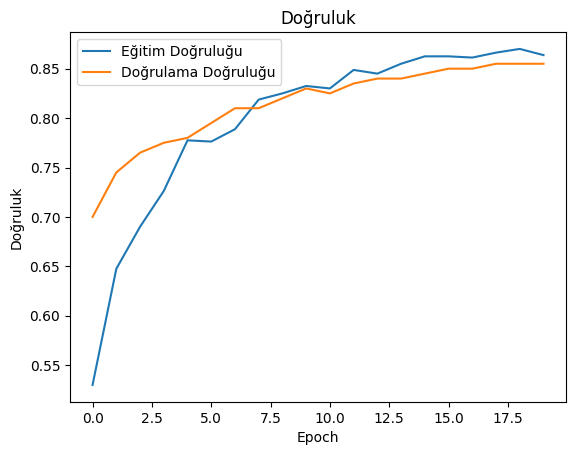

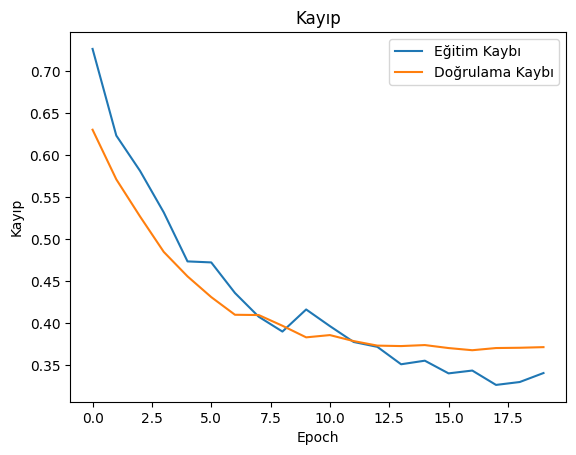

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Veri oluştur (örnek)
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Eğitim / doğrulama ayrımı
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Veriyi ölçeklendir (standartlaştır)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# 4. Model tanımı (uygun Input kullanılarak ve Dropout ile)
model = Sequential([
    Input(shape=(x_train.shape[1],)),          # uyarı mesajını önler
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')             # Binary classification
])

# 5. Model derleme
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Erken durdurma callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 7. Model eğitimi
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# 8. Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# 9. Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [16]:
from tensorflow.keras.models import load_model

model = load_model("benim_modelim.keras")

# Eğer yeniden eğiteceksen:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
from google.colab import files
files.download("benim_modelim.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)